<a href="https://colab.research.google.com/github/DeepthiVReddy/Bike-Sharing/blob/main/Bike_Sharing_Demand_Data_Cleaning_and_EDA_with_Weather_Impact_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset (assuming the file 'Day.csv' is in the same directory)
df = pd.read_csv('Day.csv')

# Check for missing values in the 'temp' column
missing_values = df['temp'].isnull().sum()

# Summarize the missing data
print(f"Number of missing values in 'temp' column: {missing_values}")

# If there are missing values, print the rows where 'temp' is missing
if missing_values > 0:
    print("Rows with missing 'temp' values:")
    print(df[df['temp'].isnull()])

# Handling missing values
# Applying mean imputation to fill the missing values with the mean of the 'temp' column
mean_temp = df['temp'].mean()
df['temp'].fillna(mean_temp, inplace=True)

# Justification:
# Mean imputation is a simple and common method used to handle missing numerical data.
# By filling missing 'temp' values with the mean temperature of the dataset, we retain
# the central tendency of the data without drastically skewing the overall distribution.

# After imputation, verify that there are no missing values in the 'temp' column
missing_values_after = df['temp'].isnull().sum()
print(f"Number of missing values in 'temp' column after imputation: {missing_values_after}")


Number of missing values in 'temp' column: 33
Rows with missing 'temp' values:
     instant      dteday  weathersit  temp     atemp      hum  windspeed  \
18        19  2011-01-19         2.0   NaN  14.92110  74.1739  13.957239   
30        31  2011-01-31         2.0   NaN   9.31250  60.3750  12.541864   
70        71  2011-03-12         1.0   NaN  16.28750  59.4583  14.791925   
99       100  2011-04-10         2.0   NaN  21.33685  85.7500   9.833389   
122      123  2011-05-03         2.0   NaN  29.10395  69.7083  22.958689   
135      136  2011-05-16         1.0   NaN  27.52560  78.7917   8.500357   
139      140  2011-05-20         1.0   NaN       NaN  71.9583   8.375871   
152      153  2011-06-02         1.0   NaN  32.19710      NaN  19.583229   
182      183  2011-07-02         1.0   NaN  33.36540  44.4583   7.709154   
216      217  2011-08-05         1.0   NaN  32.82835  63.0833  12.374632   
235      236  2011-08-24         1.0   NaN  31.53460  60.5000  16.958236   
264      

<ipython-input-1-2bea4d8c3e73>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['temp'].fillna(mean_temp, inplace=True)


<ipython-input-2-b82c518bf8d8>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['temp'].fillna(mean_temp, inplace=True)


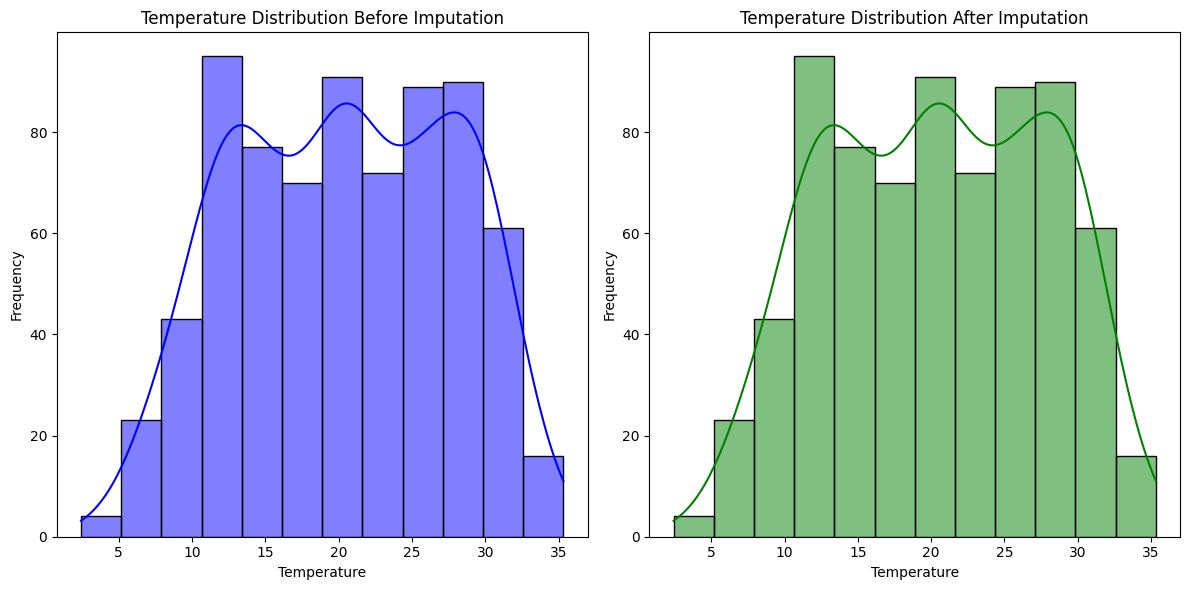

In [ ]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values in 'temp' and summarize the missing data
missing_values = df['temp'].isnull().sum()

# Store a copy of the original dataset with missing values for comparison
df_before_imputation = df.copy()

# Handling missing values: mean imputation
mean_temp = df['temp'].mean()
df['temp'].fillna(mean_temp, inplace=True)

# Visualize the distribution of 'temp' before and after imputation
plt.figure(figsize=(12, 6))

# Histogram before imputation (using original dataset copy)
plt.subplot(1, 2, 1)
sns.histplot(df_before_imputation['temp'], kde=True, color='blue')
plt.title('Temperature Distribution Before Imputation')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Histogram after imputation (using modified dataset)
plt.subplot(1, 2, 2)
sns.histplot(df['temp'], kde=True, color='green')
plt.title('Temperature Distribution After Imputation')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


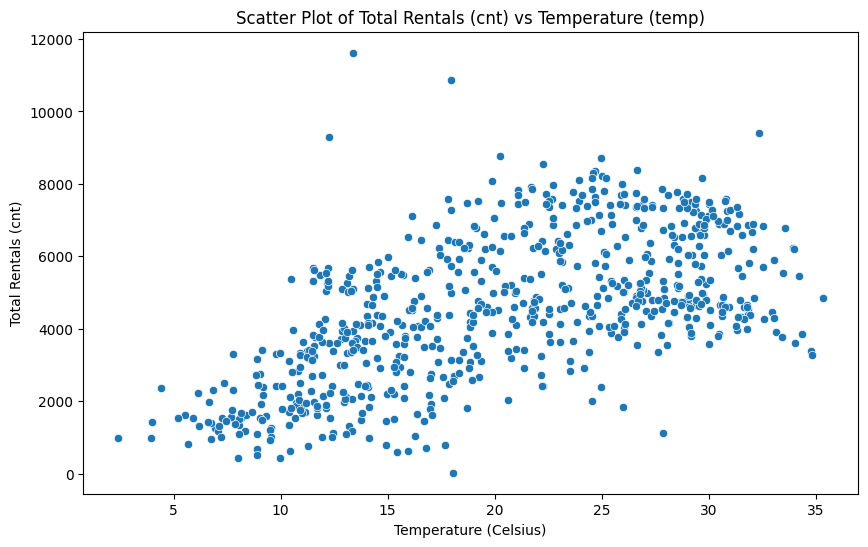

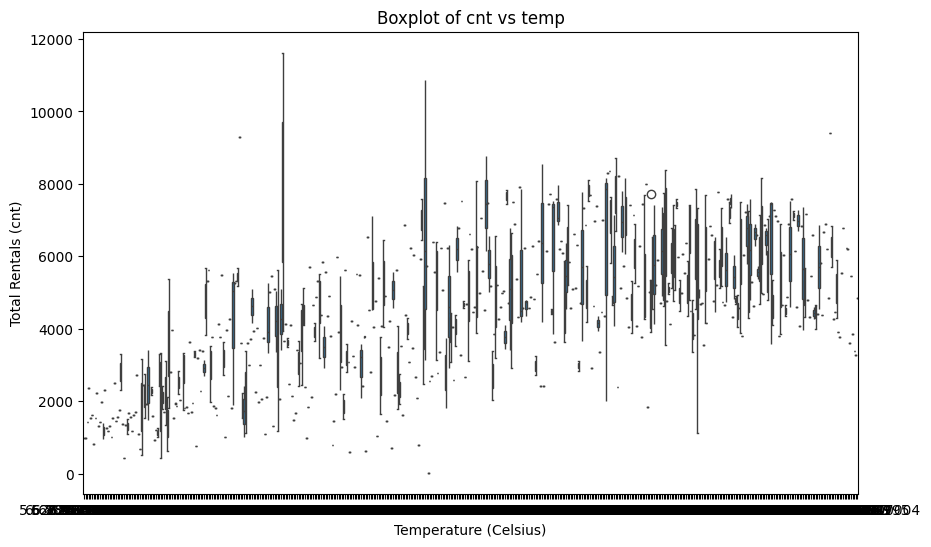

Outliers identified at rows: []


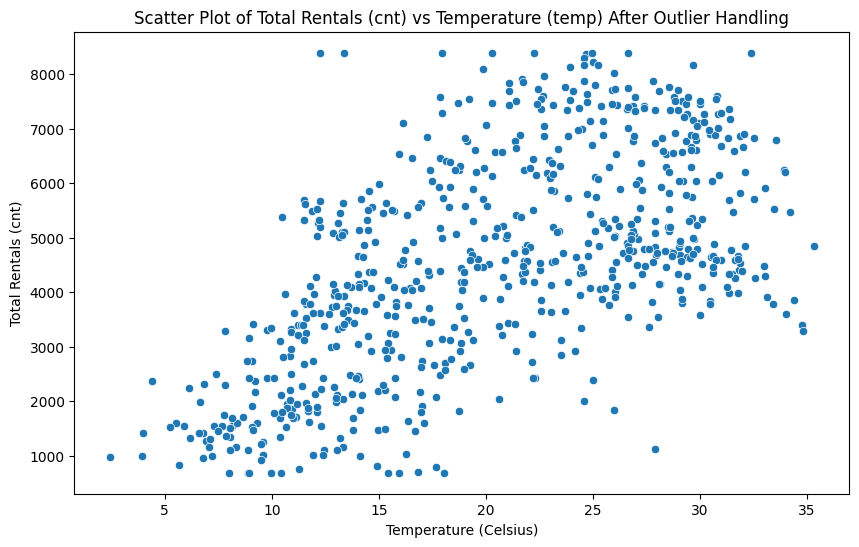

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
df = pd.read_csv('Day.csv')

# Scatter plot to visualize 'cnt' vs 'temp'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=df)
plt.title('Scatter Plot of Total Rentals (cnt) vs Temperature (temp)')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Total Rentals (cnt)')
plt.show()

# Boxplot to visualize potential outliers in 'cnt' vs 'temp'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['temp'], y=df['cnt'])
plt.title('Boxplot of cnt vs temp')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Total Rentals (cnt)')
plt.show()

# Identify outliers using Z-score for 'cnt'
# Z-score is a measure of how many standard deviations a data point is from the mean
z_scores = np.abs(stats.zscore(df[['temp', 'cnt']]))  # Calculating z-scores for both 'temp' and 'cnt'

# Set a threshold for identifying outliers
threshold = 3
outliers = np.where(z_scores > threshold)  # Identify data points where the Z-score is above the threshold

# Data points identified as outliers
outliers_indices = np.unique(outliers[0])  # Extract unique row indices of outliers
print(f'Outliers identified at rows: {outliers_indices}')

# Handling outliers:
# We will apply a capping method where we limit the values of 'cnt' and 'temp' based on the 1st and 99th percentiles.
low_percentile = df['cnt'].quantile(0.01)  # 1st percentile for 'cnt'
high_percentile = df['cnt'].quantile(0.99)  # 99th percentile for 'cnt'

# Cap the outliers
df['cnt'] = np.clip(df['cnt'], low_percentile, high_percentile)

# Plot again after handling outliers (capping)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=df)
plt.title('Scatter Plot of Total Rentals (cnt) vs Temperature (temp) After Outlier Handling')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Total Rentals (cnt)')
plt.show()


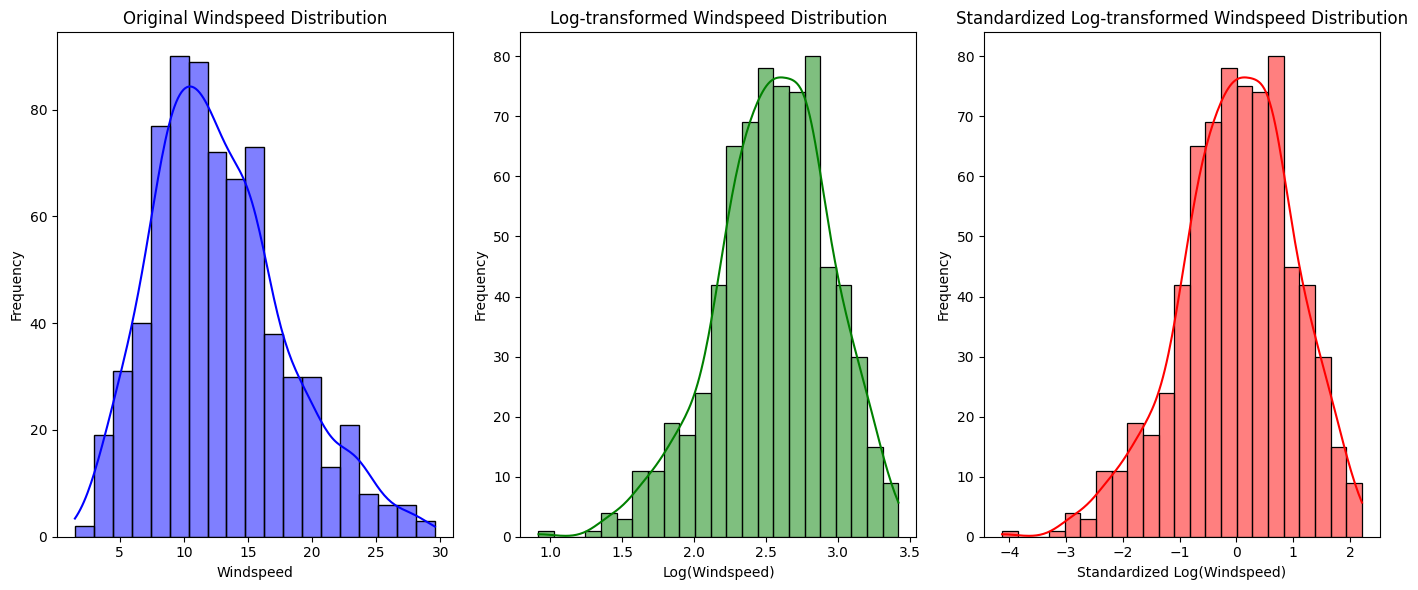

In [ ]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Day.csv')

# Log transformation of 'windspeed'
df['log_windspeed'] = np.log(df['windspeed'] + 1)  # Adding 1 to avoid log(0)

# Standardization: scale the log-transformed 'windspeed'
scaler = StandardScaler()
df['standardized_log_windspeed'] = scaler.fit_transform(df[['log_windspeed']])

# Plotting the distribution before log transformation
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['windspeed'], kde=True, color='blue')
plt.title('Original Windspeed Distribution')
plt.xlabel('Windspeed')
plt.ylabel('Frequency')

# Plotting the distribution after log transformation
plt.subplot(1, 3, 2)
sns.histplot(df['log_windspeed'], kde=True, color='green')
plt.title('Log-transformed Windspeed Distribution')
plt.xlabel('Log(Windspeed)')
plt.ylabel('Frequency')

# Plotting the distribution after log transformation and standardization
plt.subplot(1, 3, 3)
sns.histplot(df['standardized_log_windspeed'], kde=True, color='red')
plt.title('Standardized Log-transformed Windspeed Distribution')
plt.xlabel('Standardized Log(Windspeed)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


<ipython-input-6-cd0aa828c7f2>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['holiday'] == 0]['cnt'], label='Non-holiday', color='blue', shade=True)
<ipython-input-6-cd0aa828c7f2>:30: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['holiday'] == 1]['cnt'], label='Holiday', color='green', shade=True)


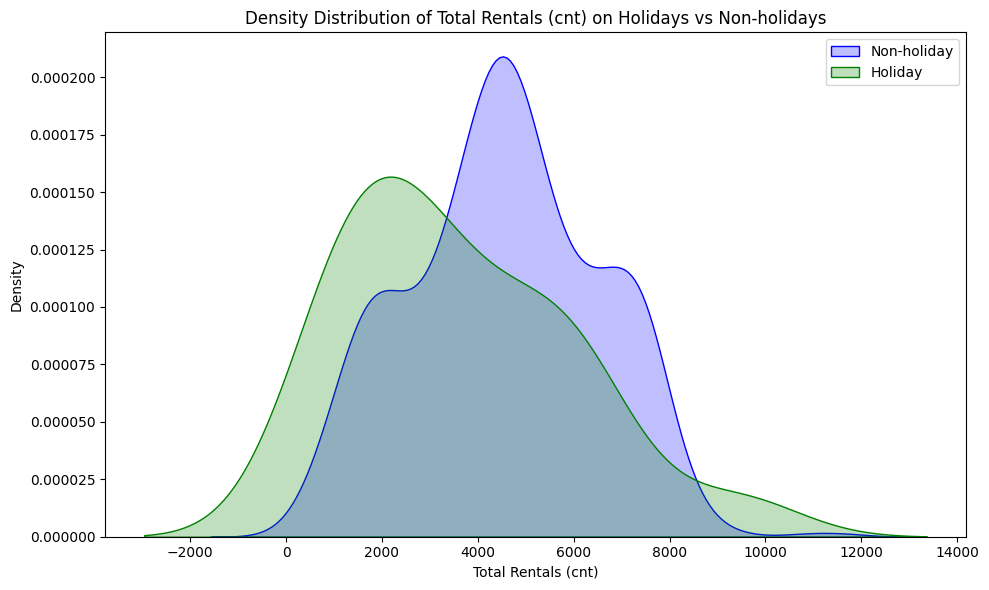

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.holiday import USFederalHolidayCalendar

# Load the dataset
df = pd.read_csv('Day.csv')

# Convert 'dteday' to datetime format
df['dteday'] = pd.to_datetime(df['dteday'])

# Create a US Federal Holiday calendar
cal = USFederalHolidayCalendar()

# Generate a list of US holidays based on the date range in the dataset
holidays = cal.holidays(start=df['dteday'].min(), end=df['dteday'].max())

# Create a 'holiday' column: 1 if the date is a holiday, else 0
df['holiday'] = df['dteday'].isin(holidays).astype(int)

# Plotting the demand density distribution for holidays and non-holidays
plt.figure(figsize=(10, 6))

# Plot density for non-holidays
sns.kdeplot(df[df['holiday'] == 0]['cnt'], label='Non-holiday', color='blue', shade=True)

# Plot density for holidays
sns.kdeplot(df[df['holiday'] == 1]['cnt'], label='Holiday', color='green', shade=True)

# Add title and labels
plt.title('Density Distribution of Total Rentals (cnt) on Holidays vs Non-holidays')
plt.xlabel('Total Rentals (cnt)')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


Distribution of 'weathersit' categories:
weathersit
1.0    455
2.0    236
3.0     20
Name: count, dtype: int64


<ipython-input-7-403cea7ae4a3>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weathersit_counts.index, y=weathersit_counts.values, palette='viridis')


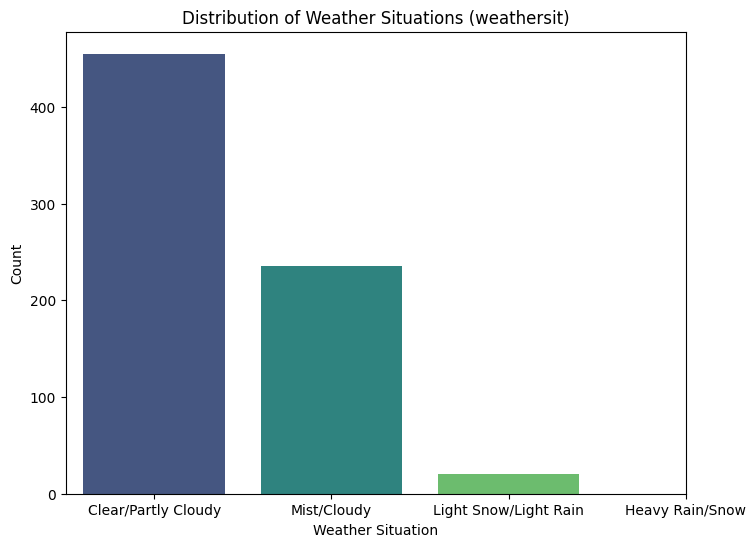

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Check the distribution of the 'weathersit' variable
weathersit_counts = df['weathersit'].value_counts()

# Print the counts of each category in 'weathersit'
print("Distribution of 'weathersit' categories:")
print(weathersit_counts)

# Plot the distribution of 'weathersit' using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=weathersit_counts.index, y=weathersit_counts.values, palette='viridis')
plt.title('Distribution of Weather Situations (weathersit)')
plt.xlabel('Weather Situation')
plt.ylabel('Count')
plt.xticks([0, 1, 2, 3], ['Clear/Partly Cloudy', 'Mist/Cloudy', 'Light Snow/Light Rain', 'Heavy Rain/Snow'])
plt.show()


New distribution after oversampling:
weathersit
1.0    455
3.0    236
2.0    236
Name: count, dtype: int64


<ipython-input-8-02f2752a206e>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_balanced['weathersit'].value_counts().index,


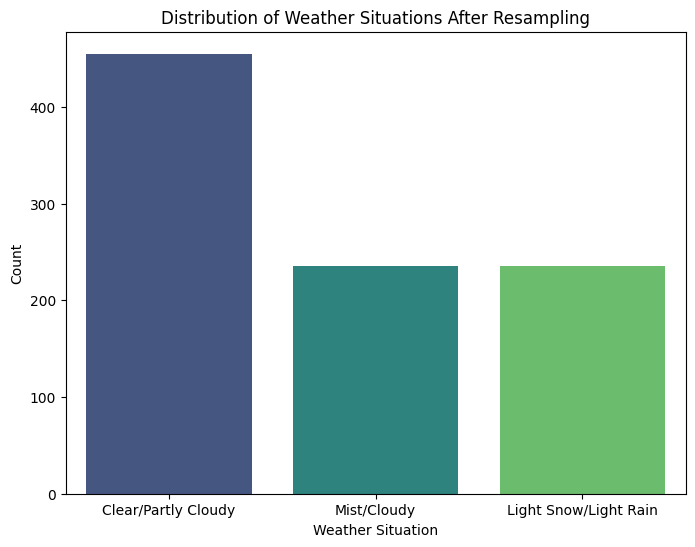

In [ ]:
from sklearn.utils import resample

# Separate the classes based on the 'weathersit' variable
df_majority_1 = df[df['weathersit'] == 1.0]
df_majority_2 = df[df['weathersit'] == 2.0]
df_minority_3 = df[df['weathersit'] == 3.0]

# Oversample the minority class (weathersit == 3.0) to match the majority class
df_minority_3_upsampled = resample(df_minority_3,
                                   replace=True,              # Sample with replacement
                                   n_samples=len(df_majority_2),  # Match number of samples to weathersit == 2.0
                                   random_state=42)           # Reproducible results

# Combine the majority class with the upsampled minority class
df_balanced = pd.concat([df_majority_1, df_majority_2, df_minority_3_upsampled])

# Shuffle the dataset to mix the oversampled data
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the new distribution
print("New distribution after oversampling:")
print(df_balanced['weathersit'].value_counts())

# Plot the new distribution to visualize the balance
plt.figure(figsize=(8, 6))
sns.barplot(x=df_balanced['weathersit'].value_counts().index,
            y=df_balanced['weathersit'].value_counts().values,
            palette='viridis')
plt.title('Distribution of Weather Situations After Resampling')
plt.xlabel('Weather Situation')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['Clear/Partly Cloudy', 'Mist/Cloudy', 'Light Snow/Light Rain'])
plt.show()
